# General

In [3]:
from astropy.io import fits
from astropy.table import hstack, vstack, Table
from scipy.ndimage.interpolation import shift
import numpy as np
import matplotlib.pyplot as plt
import rafias_lib as rl
import everett_code as ec
import pdb, glob, os
%matplotlib inline

In [4]:
files_sub = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub)

306

In [5]:
centers_sub = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, files_sub)

In [6]:
files_sub640 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub640)

60

In [7]:
centers_sub640 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub640)

In [8]:
files_full1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_481_SE_*/*.red.fits'))
len(files_full1)

225

In [9]:
centers_full1 = rl.gen_center_g2d(1405,1036,5,400,4,4,0, files_full1, red = True)

# Testing Shifts & Alignment

(320, 320)
1244 1564 (Parameter('x_mean', value=1404.89530462), Parameter('y_mean', value=1037.53371527))


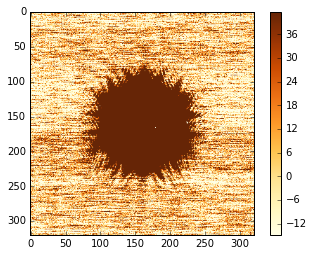

In [8]:
full1 = rl.test_image(files_full1[5])[0]
new_full1 = full1[(int(centers_full1[2][5][0])-160):(int(centers_full1[2][5][0])+160), 
                  (int(centers_full1[1][5][0])-160):(int(centers_full1[1][5][0])+160)]
print new_full1.shape
print int(centers_full1[1][5][0])-160,int(centers_full1[1][5][0])+160, centers_full1[0][5]
im = plt.imshow(new_full1, cmap = plt.cm.YlOrBr, vmin = np.percentile(new_full1, 20), 
                vmax = np.percentile(new_full1, 80))
plt.colorbar(im)

(320, 320)


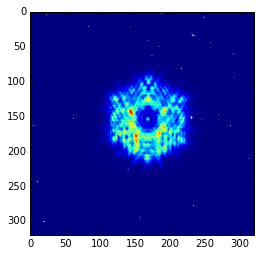

In [9]:
sub640 = rl.test_image(files_sub640[5])[0]
new_sub640 = sub640[(int(centers_sub640[1][5][0])-160):(int(centers_sub640[1][5][0])+160), 
                  (int(centers_sub640[2][5][0])-160):(int(centers_sub640[2][5][0])+160)]
print new_sub640.shape
plt.imshow(new_sub640)

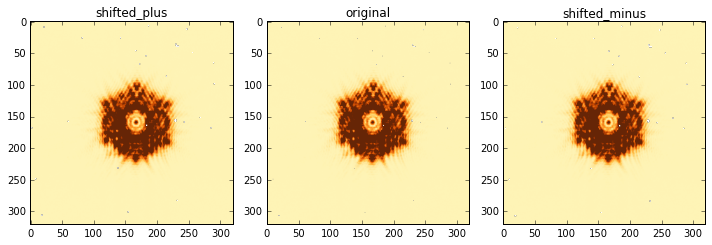

In [23]:
plt.figure(figsize=(10, 12))
ref_image = rl.test_image(files_sub[150])[0]
test_im = rl.test_image(files_sub[10])[0]
shiftX = centers_sub[1][10][0] - centers_sub[1][150][0]
shiftY = centers_sub[2][10][0] - centers_sub[2][150][0]
shifted_plus = ec.fshift(test_im, shiftX, shiftY)
shifted_minus = ec.fshift(test_im, -shiftX, -shiftY)
plt.subplot(131)
plt.imshow(shifted_plus, cmap = plt.cm.YlOrBr, vmin = -50, vmax = 300)
plt.title('shifted_plus')
plt.subplot(132)
plt.imshow(test_im, cmap = plt.cm.YlOrBr, vmin = -50, vmax = 300)
plt.title('original')
plt.subplot(133)
im = plt.imshow(shifted_minus, cmap = plt.cm.YlOrBr, vmin = -50, vmax = 300)
plt.title('shifted_minus')
# plt.colorbar(im)
plt.tight_layout()

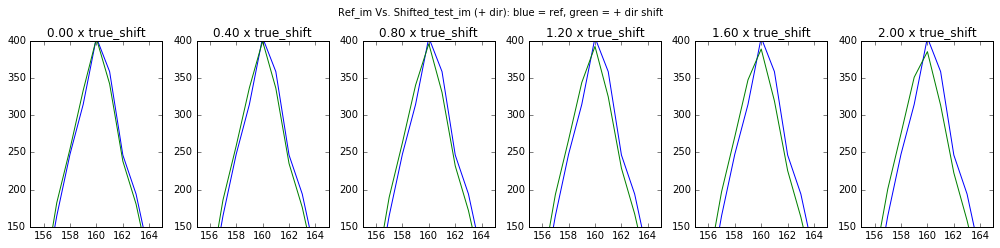

In [31]:
plt.figure(figsize=(14, 6))

for j, i in enumerate(np.arange(0, 2.2, 0.4)):
    test_im = rl.test_image(files_sub[10])[0]
    shiftX = i*(centers_sub[1][10][0] - centers_sub[1][150][0])
    shiftY = i*(centers_sub[2][10][0] - centers_sub[2][150][0])
    shifted_test_im = ec.fshift(test_im, shiftX, shiftY)
    plt.subplot(2, 6, j+1)
    plt.plot(ref_image[:,166], 'b-')
    plt.plot(shifted_test_im[:,166], 'g-', )
    plt.title('%.2f x true_shift' % i)
    plt.xlim(155,165)
    plt.ylim(150,400)
plt.suptitle('Ref_im Vs. Shifted_test_im (+ dir): blue = ref, green = + dir shift', y = 1.02)
plt.tight_layout()

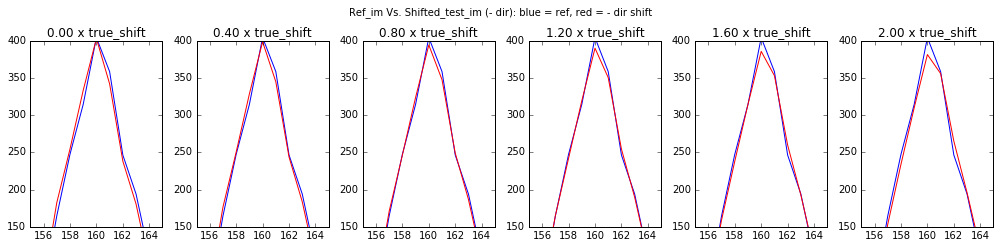

In [35]:
plt.figure(figsize=(14, 6))

for j, i in enumerate(np.arange(0, 2.2, 0.4)):
    test_im = rl.test_image(files_sub[10])[0]
    shiftX = i*(centers_sub[1][10][0] - centers_sub[1][150][0])
    shiftY = i*(centers_sub[2][10][0] - centers_sub[2][150][0])
    shifted_test_im = ec.fshift(test_im, -shiftX, -shiftY)
    plt.subplot(2, 6, j+1)
    plt.plot(ref_image[:,166], 'b-')
    plt.plot(shifted_test_im[:,166], 'r-', )
    plt.title('%.2f x true_shift' % i)
    plt.xlim(155,165)
    plt.ylim(150,400)
plt.suptitle('Ref_im Vs. Shifted_test_im (- dir): blue = ref, red = - dir shift', y = 1.02)
plt.tight_layout()

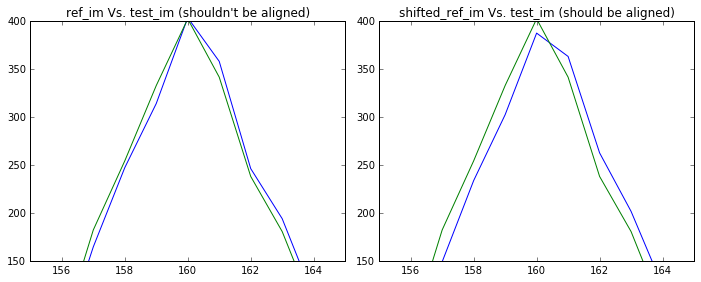

In [12]:
plt.figure(figsize = (10, 4))
ref_image = rl.test_image(files_sub[150])[0]
test_im = rl.test_image(files_sub[10])[0]
plt.subplot(121)
plt.plot(ref_image[:, 166])
plt.plot(test_im[:, 166])
plt.xlim(155,165)
plt.ylim(150,400)
plt.title("ref_im Vs. test_im (shouldn't be aligned)")
plt.subplot(122)
plt.plot(shifted_ref_im[:, 166])
plt.plot(test_im[:, 166])
plt.xlim(155,165)
plt.ylim(150,400)
plt.title("shifted_ref_im Vs. test_im (should be aligned)")
plt.tight_layout()

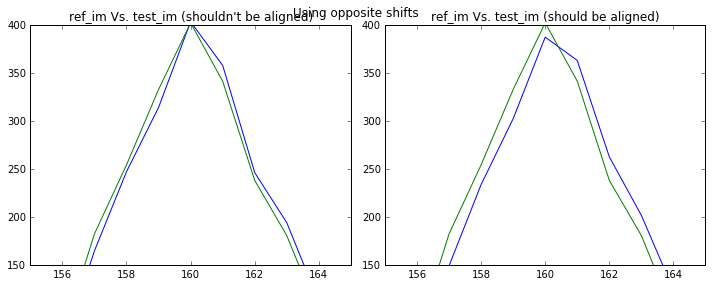

In [13]:
plt.figure(figsize = (10, 4))
test_im = rl.test_image(files_sub[10])[0]
plt.subplot(121)
plt.plot(ref_image[:, 166])
plt.plot(test_im[:, 166])
plt.xlim(155,165)
plt.ylim(150,400)
plt.title("ref_im Vs. test_im (shouldn't be aligned)")
plt.subplot(122)
plt.plot(shifted_ref_im[:, 166])
plt.plot(test_im[:, 166])
plt.xlim(155,165)
plt.ylim(150,400)
plt.title("ref_im Vs. test_im (should be aligned)")

plt.suptitle('Using opposite shifts', fontsize = 12)
plt.tight_layout()

# Animating

In [17]:
def animate(filename, centers, ind_ref, path_name, shift = True, just_image = False, which_image = 10):
    ref_image = rl.test_image(filename[ind_ref])[0]
    crpd_ref_im = ref_image[(int(centers[2][ind_ref][0])-150):(int(centers[2][ind_ref][0])+150), 
                      (int(centers[1][ind_ref][0])-150):(int(centers[1][ind_ref][0])+150)]
    minv = np.percentile(crpd_ref_im, 20) 
    maxv = np.percentile(crpd_ref_im, 80)
    for i, fname in enumerate(filename):
        image, _, _, mask = rl.test_image(fname)
        cropped_image = image[(int(centers[2][i][0])-150):(int(centers[2][i][0])+150), 
                      (int(centers[1][i][0])-150):(int(centers[1][i][0])+150)]
        if (shift == True):
            shiftX = centers[1][i][0] - centers[1][ind_ref][0]
            shiftY = centers[2][i][0] - centers[2][ind_ref][0]
            shifted_im = ec.fshift(cropped_image, -shiftX, -shiftY)
            res_image = shifted_im - crpd_ref_im
        else:
            res_image = cropped_image - crpd_ref_im

        if (just_image == True) & (which_image == i):
            return res_image, minv, maxv
            break
        im = plt.imshow(res_image, cmap = plt.cm.YlOrBr, vmin = minv, vmax = maxv)
        plt.colorbar(im)
        plt.savefig(os.path.join(path_name, 'NS_image%03i' % i))
        plt.clf()

In [16]:
# No shifting
animate(files_sub, centers_sub, 150, 'WLP8SUB', shift = False)
animate(files_sub640, centers_sub640, 30, 'WLP8SUB640', shift = False)
animate(files_full1, centers_full1, 110, 'WLP8FULL1', shift = False)

In [18]:
# Shifted using fshift
animate(files_sub, centers_sub, 150, 'WLP8SUB', shift = True)
animate(files_sub640, centers_sub640, 30, 'WLP8SUB640', shift = True)
animate(files_full1, centers_full1, 110, 'WLP8FULL1', shift = True)

In [14]:
#comparing shifts
sub_noshift, min_sub, max_sub = animate(files_sub, centers_sub, 150, 'WLP8SUB', shift = False, just_image = True, 
                                        which_image = 10)
sub640_noshift, min_sub640, max_sub640 = animate(files_sub640, centers_sub640, 30, 'WLP8SUB640', shift = False, 
                                                 just_image = True, which_image = 10)
full1_noshift, min_full1, max_full1 = animate(files_full1, centers_full1, 110, 'WLP8FULL1', shift = False, 
                                              just_image = True, which_image = 10)
sub_shift = animate(files_sub, centers_sub, 150, 'WLP8SUB', shift = True, just_image = True, which_image = 10)[0]
sub640_shift = animate(files_sub640, centers_sub640, 30, 'WLP8SUB640', shift = True, just_image = True, 
                       which_image = 10)[0]
full1_shift = animate(files_full1, centers_full1, 110, 'WLP8FULL1', shift = True, just_image = True, 
                      which_image = 10)[0]

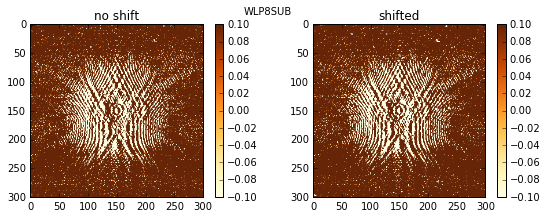

In [15]:
plt.figure(figsize = (8,3))
plt.subplot(121)
im = plt.imshow(sub_noshift, cmap = plt.cm.YlOrBr, vmin = min_sub, vmax = max_sub)
plt.colorbar(im)
plt.title('no shift')
plt.subplot(122)
im1 = plt.imshow(sub_shift, cmap = plt.cm.YlOrBr, vmin = min_sub, vmax = max_sub)
plt.colorbar(im1)
plt.title('shifted')
plt.suptitle('WLP8SUB')
plt.tight_layout()

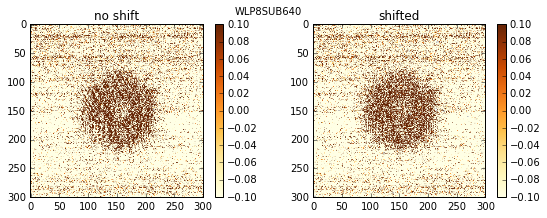

In [16]:
plt.figure(figsize = (8,3))
plt.subplot(121)
im = plt.imshow(sub640_noshift, cmap = plt.cm.YlOrBr, vmin = min_sub640, vmax = max_sub640)
plt.colorbar(im)
plt.title('no shift')
plt.subplot(122)
im1 = plt.imshow(sub640_shift, cmap = plt.cm.YlOrBr, vmin = min_sub640, vmax = max_sub640)
plt.colorbar(im1)
plt.title('shifted')
plt.suptitle('WLP8SUB640')
plt.tight_layout()

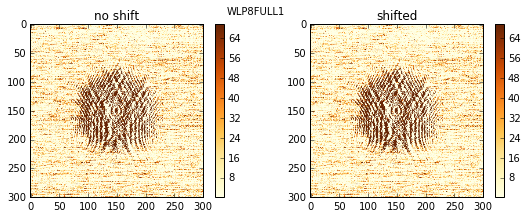

In [17]:
plt.figure(figsize = (8,3))
plt.subplot(121)
im = plt.imshow(full1_noshift, cmap = plt.cm.YlOrBr, vmin = min_full1, vmax = max_full1)
plt.colorbar(im)
plt.title('no shift')
plt.subplot(122)
im1 = plt.imshow(full1_shift, cmap = plt.cm.YlOrBr, vmin = min_full1, vmax = max_full1)
plt.colorbar(im1)
plt.title('shifted')
plt.suptitle('WLP8FULL1')
plt.tight_layout()